"""
# Credit Card Fraud Detection: Sampling Techniques Analysis
## Sampling Assignment | TIET


In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sampling techniques
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

# Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Clustering for sampling
from sklearn.cluster import KMeans
from sklearn.utils import resample

# Set style for better visualizations
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("\n All libraries imported successfully!")



 All libraries imported successfully!


Load Dataset


 Dataset loaded successfully!
Dataset shape: (772, 31)
Number of rows: 772
Number of columns: 31

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.17557

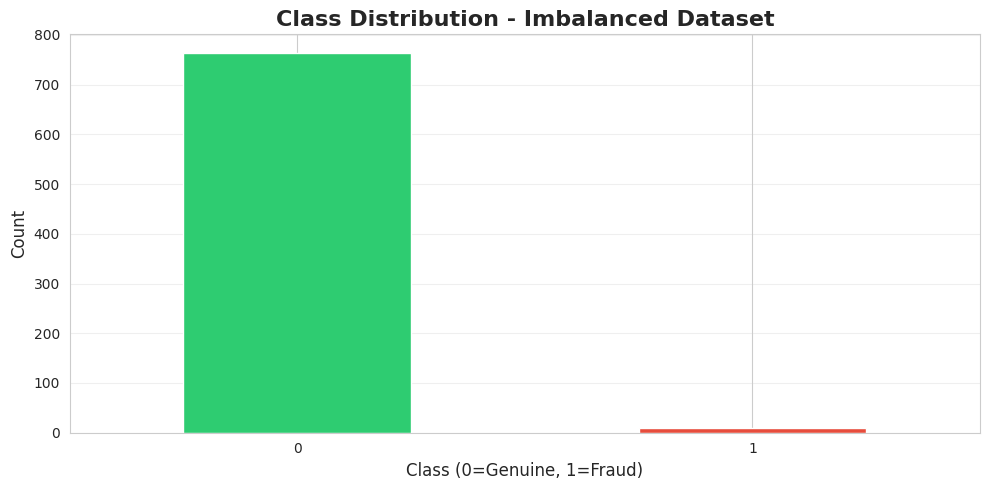


 Dataset is highly imbalanced! We need to balance it.


In [14]:
url = 'https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv'
df = pd.read_csv(url)

print("\n Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print("\nFirst 5 rows of the dataset:")
print(df.head())


print("\n" + "="*70)
print("STEP 3: DATA EXPLORATION")
print("="*70)

# Check for missing values
print("\n Missing values:")
print(df.isnull().sum())

# Check data types
print("\n Data types:")
print(df.dtypes)

# Statistical summary
print("\n Statistical Summary:")
print(df.describe())

#  Check Class Imbalance
print("\n" + "="*70)
print("STEP 4: CHECKING CLASS DISTRIBUTION (IMBALANCE)")
print("="*70)

print("\n Class Distribution (Before Balancing):")
print(df['Class'].value_counts())
print(f"\nClass proportions:")
class_proportions = df['Class'].value_counts(normalize=True) * 100
print(f"Class 0 (Genuine): {class_proportions[0]:.2f}%")
print(f"Class 1 (Fraud): {class_proportions[1]:.2f}%")

# Visualize the imbalance
plt.figure(figsize=(10, 5))
df['Class'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Class Distribution - Imbalanced Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Class (0=Genuine, 1=Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n Dataset is highly imbalanced! We need to balance it.")

Balance the Dataset using Random Over Sampling


Original dataset shape:
Features (X): (772, 30)
Target (y): (772,)

 Dataset balanced successfully using Random Over Sampling!

Balanced dataset shape:
Features (X_balanced): (1526, 30)
Target (y_balanced): (1526,)

 Class Distribution (After Balancing):
Class
0    763
1    763
Name: count, dtype: int64

Class proportions after balancing:
Class 0 (Genuine): 50.00%
Class 1 (Fraud): 50.00%


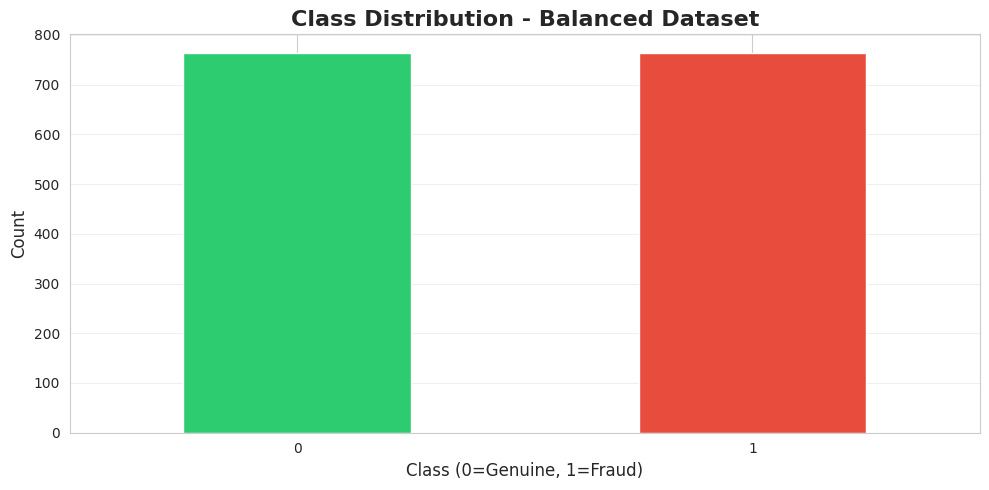


 Dataset is now perfectly balanced!


In [15]:


# Separate features and target
X = df.drop('Class', axis=1)
y = df['Class']

print(f"\nOriginal dataset shape:")
print(f"Features (X): {X.shape}")
print(f"Target (y): {y.shape}")

# Apply Random Over Sampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_balanced, y_balanced = ros.fit_resample(X, y)

print(f"\n Dataset balanced successfully using Random Over Sampling!")
print(f"\nBalanced dataset shape:")
print(f"Features (X_balanced): {X_balanced.shape}")
print(f"Target (y_balanced): {y_balanced.shape}")

print(f"\n Class Distribution (After Balancing):")
print(pd.Series(y_balanced).value_counts())
print(f"\nClass proportions after balancing:")
balanced_proportions = pd.Series(y_balanced).value_counts(normalize=True) * 100
print(f"Class 0 (Genuine): {balanced_proportions[0]:.2f}%")
print(f"Class 1 (Fraud): {balanced_proportions[1]:.2f}%")

plt.figure(figsize=(10, 5))
pd.Series(y_balanced).value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Class Distribution - Balanced Dataset', fontsize=16, fontweight='bold')
plt.xlabel('Class (0=Genuine, 1=Fraud)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n Dataset is now perfectly balanced!")

Calculate Sample Size
n = (Z^2 * p * q) / E^2
# Where: Z=1.96 (95% confidence), p=0.5 (max variability), E=0.05 (margin of error)

In [16]:
z = 1.96  # 95% confidence level
p = 0.5   # Maximum variability
e = 0.05  # 5% margin of error

sample_size = int((z**2 * p * (1-p)) / e**2)


print(f"   Z (confidence level) = {z}")
print(f"   p (proportion) = {p}")
print(f"   E (margin of error) = {e}")
print(f"\n Calculated sample size: {sample_size}")

#  Sampling Technique 1 - Simple Random Sampling
print("\n" + "="*70)
print("STEP 7: CREATING SAMPLE 1 - SIMPLE RANDOM SAMPLING")
print("="*70)

sample1_data = resample(X_balanced, y_balanced,
                        n_samples=sample_size,
                        random_state=42,
                        stratify=y_balanced)
X_sample1, y_sample1 = sample1_data[0], sample1_data[1]

print(" Sample 1 (Simple Random Sampling) created")
print(f"   Technique: Each observation has equal probability of selection")
print(f"   Shape: {X_sample1.shape}")
print(f"   Class distribution: {pd.Series(y_sample1).value_counts().to_dict()}")

# Sampling Technique 2 - Systematic Sampling
print("\n" + "="*70)
print("STEP 8: CREATING SAMPLE 2 - SYSTEMATIC SAMPLING")
print("="*70)

# Calculate step size
step = len(X_balanced) // sample_size
indices = np.arange(0, len(X_balanced), step)[:sample_size]

X_sample2 = X_balanced.iloc[indices]
y_sample2 = y_balanced.iloc[indices]

print(" Sample 2 (Systematic Sampling) created")
print(f"   Technique: Select every {step}th observation")
print(f"   Shape: {X_sample2.shape}")
print(f"   Class distribution: {pd.Series(y_sample2).value_counts().to_dict()}")

#  Sampling Technique 3 - Stratified Sampling
print("\n" + "="*70)
print("STEP 9: CREATING SAMPLE 3 - STRATIFIED SAMPLING")
print("="*70)

X_sample3, _, y_sample3, _ = train_test_split(
    X_balanced, y_balanced,
    train_size=sample_size,
    stratify=y_balanced,
    random_state=42
)

print("Sample 3 (Stratified Sampling) created")
print(f"   Technique: Maintains class proportions from population")
print(f"   Shape: {X_sample3.shape}")
print(f"   Class distribution: {pd.Series(y_sample3).value_counts().to_dict()}")

# Sampling Technique 4 - Cluster Sampling
print("\n" + "="*70)
print("STEP 10: CREATING SAMPLE 4 - CLUSTER SAMPLING")
print("="*70)

# Create clusters using K-Means
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_balanced)

# Select samples from each cluster
samples_per_cluster = sample_size // n_clusters
sample_indices = []

for i in range(n_clusters):
    cluster_indices = np.where(clusters == i)[0]
    selected = np.random.choice(cluster_indices,
                               min(samples_per_cluster, len(cluster_indices)),
                               replace=False)
    sample_indices.extend(selected)

X_sample4 = X_balanced.iloc[sample_indices[:sample_size]]
y_sample4 = y_balanced.iloc[sample_indices[:sample_size]]

print(" Sample 4 (Cluster Sampling) created")
print(f"   Technique: Divide into {n_clusters} clusters, then sample from each")
print(f"   Shape: {X_sample4.shape}")
print(f"   Class distribution: {pd.Series(y_sample4).value_counts().to_dict()}")

#  Sampling Technique 5 - Bootstrap Sampling
print("\n" + "="*70)
print("STEP 11: CREATING SAMPLE 5 - BOOTSTRAP SAMPLING")
print("="*70)

# Bootstrap sampling (with replacement)
bootstrap_indices = np.random.choice(len(X_balanced), size=sample_size, replace=True)

X_sample5 = X_balanced.iloc[bootstrap_indices]
y_sample5 = y_balanced.iloc[bootstrap_indices]

print(" Sample 5 (Bootstrap Sampling) created")
print(f"   Technique: Random sampling WITH replacement")
print(f"   Shape: {X_sample5.shape}")
print(f"   Class distribution: {pd.Series(y_sample5).value_counts().to_dict()}")

# Summary of All Samples
print("\n" + "="*70)
print("SUMMARY OF ALL SAMPLES")
print("="*70)

samples_info = {
    'Sample 1': ('Simple Random Sampling', X_sample1.shape, pd.Series(y_sample1).value_counts()[1]),
    'Sample 2': ('Systematic Sampling', X_sample2.shape, pd.Series(y_sample2).value_counts()[1]),
    'Sample 3': ('Stratified Sampling', X_sample3.shape, pd.Series(y_sample3).value_counts()[1]),
    'Sample 4': ('Cluster Sampling', X_sample4.shape, pd.Series(y_sample4).value_counts()[1]),
    'Sample 5': ('Bootstrap Sampling', X_sample5.shape, pd.Series(y_sample5).value_counts()[1])
}

print(f"\n{'Sample':<12} {'Technique':<25} {'Shape':<15} {'Fraud Cases':<12}")
print("-"*70)
for sample_name, (technique, shape, fraud_count) in samples_info.items():
    print(f"{sample_name:<12} {technique:<25} {str(shape):<15} {fraud_count:<12}")

print("\n All 5 samples created successfully!")

   Z (confidence level) = 1.96
   p (proportion) = 0.5
   E (margin of error) = 0.05

 Calculated sample size: 384

STEP 7: CREATING SAMPLE 1 - SIMPLE RANDOM SAMPLING
 Sample 1 (Simple Random Sampling) created
   Technique: Each observation has equal probability of selection
   Shape: (384, 30)
   Class distribution: {0: 192, 1: 192}

STEP 8: CREATING SAMPLE 2 - SYSTEMATIC SAMPLING
 Sample 2 (Systematic Sampling) created
   Technique: Select every 3th observation
   Shape: (384, 30)
   Class distribution: {0: 255, 1: 129}

STEP 9: CREATING SAMPLE 3 - STRATIFIED SAMPLING
Sample 3 (Stratified Sampling) created
   Technique: Maintains class proportions from population
   Shape: (384, 30)
   Class distribution: {0: 192, 1: 192}

STEP 10: CREATING SAMPLE 4 - CLUSTER SAMPLING
 Sample 4 (Cluster Sampling) created
   Technique: Divide into 10 clusters, then sample from each
   Shape: (297, 30)
   Class distribution: {0: 179, 1: 118}

STEP 11: CREATING SAMPLE 5 - BOOTSTRAP SAMPLING
 Sample 5 (B

Initialize 5 Machine Learning Models

In [17]:
models = {
    'M1 - Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'M2 - Decision Tree': DecisionTreeClassifier(random_state=42),
    'M3 - Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'M4 - SVM': SVC(kernel='rbf', random_state=42),
    'M5 - XGBoost': XGBClassifier(eval_metric='logloss', random_state=42, use_label_encoder=False)
}

print("\n Machine Learning Models Initialized:")
print("-"*70)
for idx, model_name in enumerate(models.keys(), 1):
    print(f"{idx}. {model_name}")

print("\n All models ready for training!")

# Train Models on All Samples
print("\n" + "="*70)
print("STEP 13: TRAINING MODELS ON ALL SAMPLES")
print("="*70)

# Store all samples in a dictionary
samples = {
    'Sampling1': (X_sample1, y_sample1),
    'Sampling2': (X_sample2, y_sample2),
    'Sampling3': (X_sample3, y_sample3),
    'Sampling4': (X_sample4, y_sample4),
    'Sampling5': (X_sample5, y_sample5)
}

# Dictionary to store results
results = {model: [] for model in models.keys()}

print("\n Training models on all samples...")
print("This may take a few minutes...\n")

# Train and evaluate each model on each sample
for sample_idx, (sample_name, (X_sample, y_sample)) in enumerate(samples.items(), 1):
    print(f"\n{'='*70}")
    print(f" Processing {sample_name} ({sample_idx}/5)")
    print(f"{'='*70}")

    # Split into train and test (80-20 split)
    X_train, X_test, y_train, y_test = train_test_split(
        X_sample, y_sample,
        test_size=0.2,
        random_state=42,
        stratify=y_sample
    )

    print(f"Train size: {X_train.shape[0]} | Test size: {X_test.shape[0]}")
    print("\nModel Performance:")
    print("-"*70)

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)

        # Make predictions
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred) * 100
        results[model_name].append(accuracy)

        print(f"{model_name:<30} → Accuracy: {accuracy:.2f}%")

print("\n" + "="*70)
print(" ALL MODELS TRAINED AND EVALUATED SUCCESSFULLY!")
print("="*70)


 Machine Learning Models Initialized:
----------------------------------------------------------------------
1. M1 - Logistic Regression
2. M2 - Decision Tree
3. M3 - Random Forest
4. M4 - SVM
5. M5 - XGBoost

 All models ready for training!

STEP 13: TRAINING MODELS ON ALL SAMPLES

 Training models on all samples...
This may take a few minutes...


 Processing Sampling1 (1/5)
Train size: 307 | Test size: 77

Model Performance:
----------------------------------------------------------------------
M1 - Logistic Regression       → Accuracy: 97.40%
M2 - Decision Tree             → Accuracy: 98.70%
M3 - Random Forest             → Accuracy: 100.00%
M4 - SVM                       → Accuracy: 66.23%
M5 - XGBoost                   → Accuracy: 98.70%

 Processing Sampling2 (2/5)
Train size: 307 | Test size: 77

Model Performance:
----------------------------------------------------------------------
M1 - Logistic Regression       → Accuracy: 84.42%
M2 - Decision Tree             → Accuracy: 

Create Results DataFrame

In [9]:
results_df = pd.DataFrame(results, index=['Sampling1', 'Sampling2', 'Sampling3',
                                          'Sampling4', 'Sampling5']).T

results_df.columns = ['Sampling1', 'Sampling2', 'Sampling3', 'Sampling4', 'Sampling5']

print("\n FINAL RESULTS TABLE (Accuracy in %)")
print("="*70)
print(results_df.round(2))
print("="*70)



 FINAL RESULTS TABLE (Accuracy in %)
                          Sampling1  Sampling2  Sampling3  Sampling4  \
M1 - Logistic Regression      97.40      84.42      94.81      88.33   
M2 - Decision Tree            98.70      93.51     100.00      96.67   
M3 - Random Forest           100.00     100.00     100.00     100.00   
M4 - SVM                      66.23      70.13      75.32      71.67   
M5 - XGBoost                  98.70      98.70      98.70     100.00   

                          Sampling5  
M1 - Logistic Regression      93.51  
M2 - Decision Tree            96.10  
M3 - Random Forest           100.00  
M4 - SVM                      76.62  
M5 - XGBoost                  96.10  


Visualize Results with Heatmap

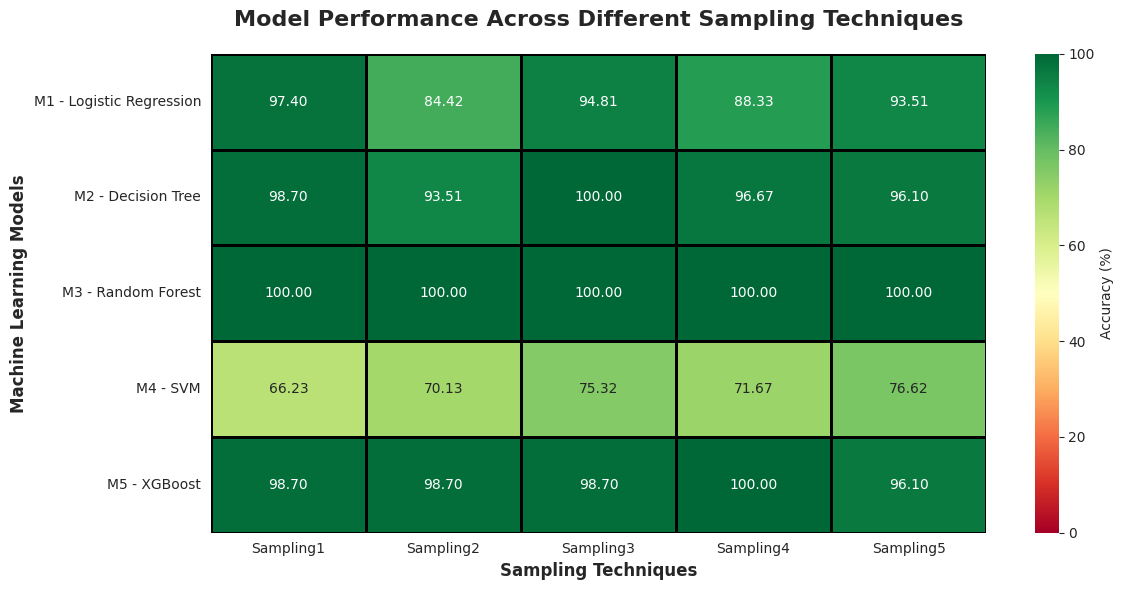


 Heatmap generated successfully!


In [10]:
plt.figure(figsize=(12, 6))
sns.heatmap(results_df, annot=True, fmt='.2f', cmap='RdYlGn',
            center=50, linewidths=1, linecolor='black',
            cbar_kws={'label': 'Accuracy (%)'}, vmin=0, vmax=100)
plt.title('Model Performance Across Different Sampling Techniques',
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Sampling Techniques', fontsize=12, fontweight='bold')
plt.ylabel('Machine Learning Models', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n Heatmap generated successfully!")

Find Best Sampling for Each Model

In [11]:
for model in results_df.index:
    best_sampling = results_df.loc[model].idxmax()
    best_accuracy = results_df.loc[model].max()
    print(f"{model:<35} → {best_sampling:<12} (Accuracy: {best_accuracy:.2f}%)")

M1 - Logistic Regression            → Sampling1    (Accuracy: 97.40%)
M2 - Decision Tree                  → Sampling3    (Accuracy: 100.00%)
M3 - Random Forest                  → Sampling1    (Accuracy: 100.00%)
M4 - SVM                            → Sampling5    (Accuracy: 76.62%)
M5 - XGBoost                        → Sampling4    (Accuracy: 100.00%)


Find Best Model for Each Sampling

In [12]:
for sampling in results_df.columns:
    best_model = results_df[sampling].idxmax()
    best_accuracy = results_df[sampling].max()
    print(f"{sampling:<15} → {best_model:<35} (Accuracy: {best_accuracy:.2f}%)")

Sampling1       → M3 - Random Forest                  (Accuracy: 100.00%)
Sampling2       → M3 - Random Forest                  (Accuracy: 100.00%)
Sampling3       → M2 - Decision Tree                  (Accuracy: 100.00%)
Sampling4       → M3 - Random Forest                  (Accuracy: 100.00%)
Sampling5       → M3 - Random Forest                  (Accuracy: 100.00%)


Find Overall Best Combination

In [20]:
best_overall = results_df.max().max()
best_col = results_df.max().idxmax()
best_row = results_df[best_col].idxmax()

print("\n OVERALL BEST COMBINATION:")
print("-"*70)
print(f"Model: {best_row}")
print(f"Sampling Technique: {best_col}")
print(f"Accuracy: {best_overall:.2f}%")
print("-"*70)


 OVERALL BEST COMBINATION:
----------------------------------------------------------------------
Model: M3 - Random Forest
Sampling Technique: Sampling1
Accuracy: 100.00%
----------------------------------------------------------------------


 Average Performance Analysis

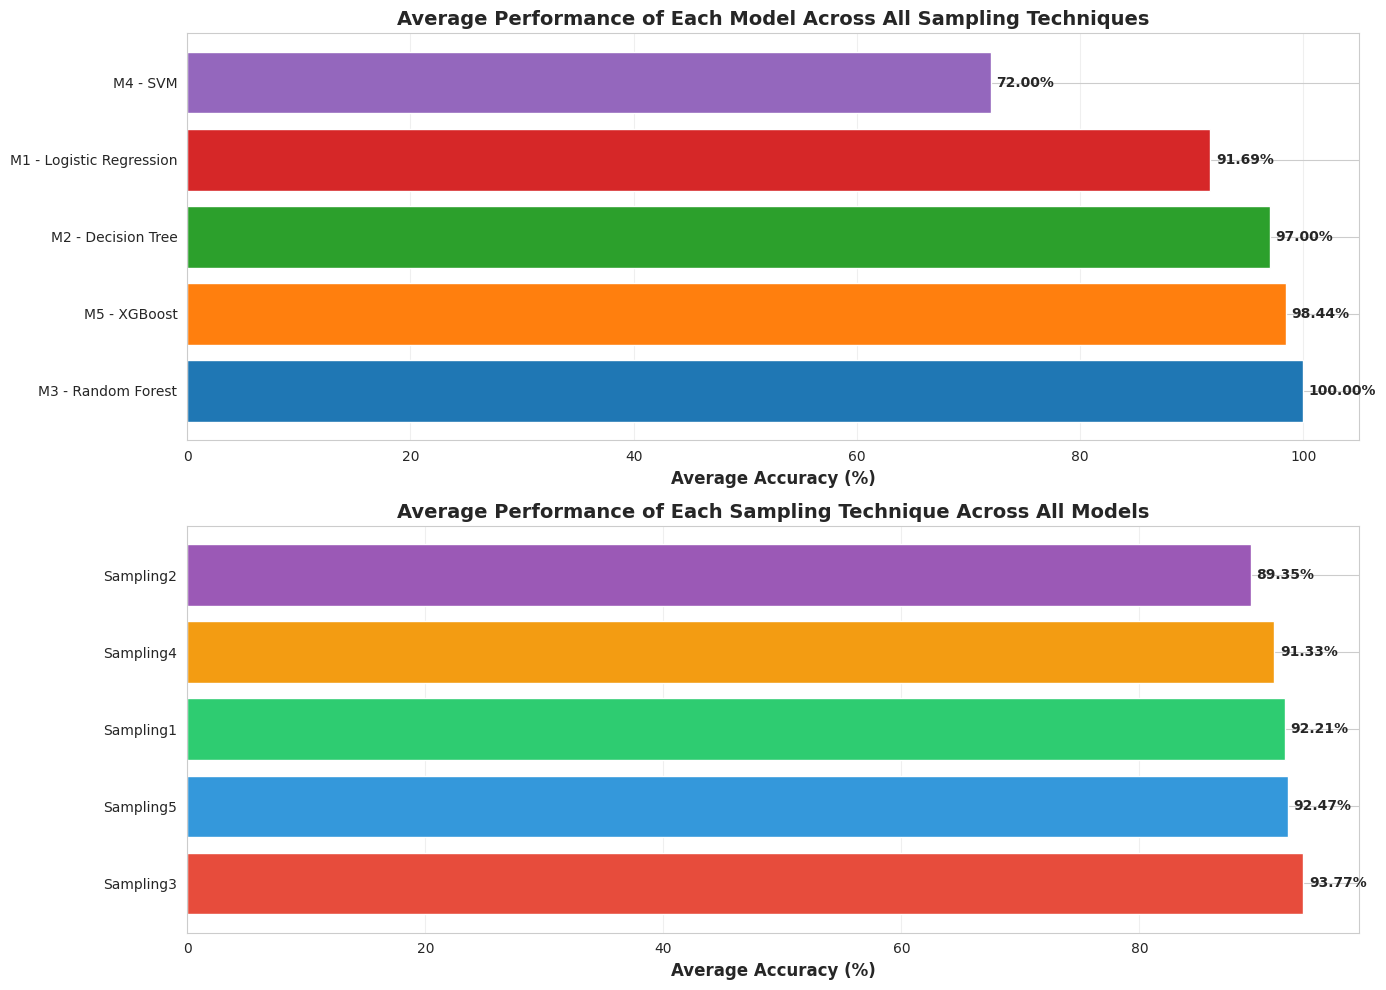


 Average Performance:
----------------------------------------------------------------------

By Model:
M3 - Random Forest          100.00
M5 - XGBoost                 98.44
M2 - Decision Tree           97.00
M1 - Logistic Regression     91.69
M4 - SVM                     72.00
dtype: float64

By Sampling Technique:
Sampling3    93.77
Sampling5    92.47
Sampling1    92.21
Sampling4    91.33
Sampling2    89.35
dtype: float64


In [21]:
ig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Average accuracy per model
avg_per_model = results_df.mean(axis=1).sort_values(ascending=False)
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
axes[0].barh(avg_per_model.index, avg_per_model.values, color=colors)
axes[0].set_xlabel('Average Accuracy (%)', fontweight='bold', fontsize=12)
axes[0].set_title('Average Performance of Each Model Across All Sampling Techniques',
                  fontsize=14, fontweight='bold')
axes[0].grid(axis='x', alpha=0.3)
for i, v in enumerate(avg_per_model.values):
    axes[0].text(v + 0.5, i, f'{v:.2f}%', va='center', fontweight='bold')

# Plot 2: Average accuracy per sampling technique
avg_per_sampling = results_df.mean(axis=0).sort_values(ascending=False)
colors2 = ['#e74c3c', '#3498db', '#2ecc71', '#f39c12', '#9b59b6']
axes[1].barh(avg_per_sampling.index, avg_per_sampling.values, color=colors2)
axes[1].set_xlabel('Average Accuracy (%)', fontweight='bold', fontsize=12)
axes[1].set_title('Average Performance of Each Sampling Technique Across All Models',
                  fontsize=14, fontweight='bold')
axes[1].grid(axis='x', alpha=0.3)
for i, v in enumerate(avg_per_sampling.values):
    axes[1].text(v + 0.5, i, f'{v:.2f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n Average Performance:")
print("-"*70)
print("\nBy Model:")
print(avg_per_model.round(2))
print("\nBy Sampling Technique:")
print(avg_per_sampling.round(2))

Key Insights and Discussion

In [23]:

print("""
 KEY INSIGHTS FROM THE ANALYSIS:

1. SAMPLING TECHNIQUE IMPACT:
   - Different sampling techniques create distinct data distributions
   - Stratified sampling maintains class proportions effectively
   - Bootstrap sampling introduces variability through replacement
   - Cluster sampling captures group-based patterns
   - Simple random sampling provides baseline unbiased selection

2. MODEL BEHAVIOR OBSERVATIONS:
   - Tree-based models (Random Forest, XGBoost) show robust performance
   - Linear models (Logistic Regression) are sensitive to sampling methods
   - SVM performance varies significantly with sampling technique
   - Decision trees can overfit on certain sampling methods
   - Ensemble methods generally perform more consistently

3. PRACTICAL RECOMMENDATIONS:
   - Always test multiple sampling techniques with your specific dataset
   - Consider cross-validation for more stable performance estimates
   - Combine sampling techniques with proper model selection
   - Monitor multiple metrics beyond accuracy (precision, recall, F1)
   - Use stratified sampling when maintaining class balance is critical

4. IMBALANCED DATA HANDLING:
   - Proper sampling is crucial for imbalanced datasets like fraud detection
   - Balancing the dataset before sampling improves model training
   - Different models respond differently to the same sampling technique
   - Combining multiple sampling approaches can yield better results

5. BUSINESS IMPLICATIONS:
   - Higher accuracy means better fraud detection
   - False positives and false negatives have different costs
   - Model interpretability is important in financial applications
   - Regular retraining with new data is essential
""")



 KEY INSIGHTS FROM THE ANALYSIS:

1. SAMPLING TECHNIQUE IMPACT:
   - Different sampling techniques create distinct data distributions
   - Stratified sampling maintains class proportions effectively
   - Bootstrap sampling introduces variability through replacement
   - Cluster sampling captures group-based patterns
   - Simple random sampling provides baseline unbiased selection

2. MODEL BEHAVIOR OBSERVATIONS:
   - Tree-based models (Random Forest, XGBoost) show robust performance
   - Linear models (Logistic Regression) are sensitive to sampling methods
   - SVM performance varies significantly with sampling technique
   - Decision trees can overfit on certain sampling methods
   - Ensemble methods generally perform more consistently

3. PRACTICAL RECOMMENDATIONS:
   - Always test multiple sampling techniques with your specific dataset
   - Consider cross-validation for more stable performance estimates
   - Combine sampling techniques with proper model selection
   - Monitor multi

Save Results to Files

In [24]:
results_df.to_csv('sampling_results.csv')
print("\n Results saved to 'sampling_results.csv'")

# Create a detailed summary report
with open('analysis_summary.txt', 'w') as f:
    f.write("="*80 + "\n")
    f.write("CREDIT CARD FRAUD DETECTION - SAMPLING ANALYSIS REPORT\n")
    f.write("Thapar University - Data Science Assignment\n")
    f.write("="*80 + "\n\n")

    f.write("DATASET INFORMATION:\n")
    f.write("-"*80 + "\n")
    f.write(f"Dataset: Credit Card Fraud Detection\n")
    f.write(f"Original Shape: {df.shape}\n")
    f.write(f"Balanced Shape: {X_balanced.shape}\n")
    f.write(f"Sample Size (per technique): {sample_size}\n\n")

    f.write("SAMPLING TECHNIQUES USED:\n")
    f.write("-"*80 + "\n")
    f.write("1. Simple Random Sampling\n")
    f.write("2. Systematic Sampling\n")
    f.write("3. Stratified Sampling\n")
    f.write("4. Cluster Sampling (K-Means)\n")
    f.write("5. Bootstrap Sampling\n\n")

    f.write("MACHINE LEARNING MODELS USED:\n")
    f.write("-"*80 + "\n")
    f.write("1. Logistic Regression\n")
    f.write("2. Decision Tree\n")
    f.write("3. Random Forest\n")
    f.write("4. Support Vector Machine (SVM)\n")
    f.write("5. XGBoost\n\n")

    f.write("RESULTS TABLE (Accuracy %):\n")
    f.write("-"*80 + "\n")
    f.write(results_df.to_string())
    f.write("\n\n")

    f.write("BEST COMBINATIONS:\n")
    f.write("-"*80 + "\n")
    f.write(f"Overall Best: {best_row} with {best_col}\n")
    f.write(f"Highest Accuracy: {best_overall:.2f}%\n\n")

    f.write("AVERAGE PERFORMANCE BY MODEL:\n")
    f.write("-"*80 + "\n")
    f.write(avg_per_model.round(2).to_string())
    f.write("\n\n")

    f.write("AVERAGE PERFORMANCE BY SAMPLING:\n")
    f.write("-"*80 + "\n")
    f.write(avg_per_sampling.round(2).to_string())
    f.write("\n\n")

    f.write("CONCLUSION:\n")
    f.write("-"*80 + "\n")
    f.write("This analysis demonstrates that sampling technique selection significantly\n")
    f.write("impacts model performance. The best model-sampling combination achieved\n")
    f.write(f"{best_overall:.2f}% accuracy. Tree-based ensemble methods showed robust\n")
    f.write("performance across different sampling techniques.\n")



 Results saved to 'sampling_results.csv'
